![UVic logo](https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1406151713/wptak6xuezyh36b1hbty.png)

# **ECE 471/536 Spring 2021: Computer Vision**
## Assignment 1: Math Preliminaries and Programming Introduction
### Due date: January 28th, 11:59 PM PST


> Student: Nolan Caissie, V00878989
---
Abstract: *This first assignment is divided into two main components, namely: 1) a set of mathematical questions relevant to the topics covered in the course and 2) an introductory Python-based programming project.*
 

## **1. Instructions:** follow the intructions provided on a sequential manner. 
### 1.0 **Identification** 
Please enter your name and V number on the text code above.

### 1.1 **Submission package**
Your final submission package must be submitted using the [BrightSpace](https://https://bright.uvic.ca/d2l/home)  platform. You will find this assignment's specific page under **Course Tools > Assignments**. Your submission package consists of a *.zip* file containing:

1.   *.ipynb* file: your modified version of this Google Colab template. Place your complete assignment solution/information in this version.  
2.   *.pdf* file: a document containing a writeup with the answers to mathematical questions. 

### 1.2 **Coding considerations**
* In previous years we asked students to complete assignments offline by installing either MATLAB or a Python environment in their computers. In order to standardize the submissions and guarantee that everyone has access to the same Python environment, all assignments are going to be described (by us) and completed (by you) using the same Google Colab reference template script.
* Google Colab offers a Python environment that can be accessed in your browser and executed using Google Cloud, so no local installation is necessary. It makes the setting-up process significantly easier! Please read [this quick tutorial](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb) notebook on Google Colab/Python.

### 1.3 **Creating your Google Colab submission file**

* Modify this template with your solutions to the assignment. You will find "**TO-DO**" indicators throughout the assingment highlighting portions of the code you are asked to complete. 
* Colab notebooks are divided into individual cells. You can execute the code inside of a given cell by pressing **CTRL+ENTER**, or that of all cells by pressing **CTRL+F9**. Variables must be "executed" in a cell before being used by subsequent ones (the same goes for libraries imported). Note that some cells of this assignment contain flags that must by changed (and executed) before you move forward.
* If you completed the whole assignment, make sure that simply pressing "**CTRL+F9**" executes all cells correctly. **This is going to be the first marking step we will execute when evaluating your submission**.  

### 1.4 **Use of open source code**

* The use of small segments of freely-available code is permitted. However, it is **extremely important** that you indicate in your in-code comments where these are used, as well as their sources. Failure to do so can be considered plagiarism, which is a serious offence. Learn more about detection mechanisms and consequences of plagiarism at UVic [here](https://www.uvic.ca/library/research/citation/plagiarism/). Note that the programming assignments are designed so that most of their content should be created by you.     
* A number of functions/algorithms are already implemented by libraries we will use (e.g., [OpenCV](https://opencv.org/), [scikit-learn](https://scikit-learn.org/stable/)), however you should not use them unless otherwise instructed to do so. Mannualy coding some of these function is an important part of the learning process.  


In [1]:
READ_THE_INSTRUCTIONS_FLAG = True
# change this flag after reading the instructions

## **2. Mathematical questions (23 points)**

### **2.1 Linear Algebra**

Consider the following vectors and matrix to answer the questions. If you believe that a particular question has no answer, justify why. Your work should be reported in the *.pdf* document included in the submission package. 

$v$ = \begin{bmatrix} 
    1 & 2 & 3
    \end{bmatrix}

$B$ = \begin{bmatrix} 
    1 & 2 & 0 \\
    3 & 4 & 0 \\
    5 & 6 & 0 
    \end{bmatrix}

$A$ = \begin{bmatrix}
    3 & 2 & 0 \\
    1 & 2 & 1 \\
    -1 & 0 & 1 
    \end{bmatrix}   

* 2.1.a) $v + 1$ (1 point) 
* 2.1.b) $v + v^{T}$ (1 point) 
* 2.1.c) $v \cdot v^T$ (dot product) (2 points)
* 2.1.d) $v \times B$ (cross product). Consider that each column in $B$ represents an individual vector. You can follow that same consideration when writing your answer (i.e., as a matrix) (4 points)
* 2.1.e) $v \bullet B$ (matrix multiplication) (2 points)
* 2.1.f) Calculate the eigenvalues of $A$ (10 points)
* 2.1.g) Give one example of a property of the data that eigenvalues/eigenvectors represent (i.e., why is calculating the eigenvalues/eigenvectors useful)? (3 marks)


***Please see PDF***

# **3. Programming: introduction to Python, Colab and OpenCV (77 points)**

### **3.1 Basic image operations** (27 points)


---



---


In the first part of this programming assignment, you will load, transform, display and save an input image. (5 Points)  

In [2]:
!pwd

/content


In [3]:
!ls

sample_data


In [4]:
#@title
import sys 
import os
import cv2 # imports OpenCV
import numpy as np
import fnmatch
from matplotlib import pyplot as plt #imports matplotlib 
from google.colab.patches import cv2_imshow
%matplotlib inline

print('-'*40)
print ('Python version: {}'.format(sys.version))
print('OpenCV version: {}'.format(cv2.__version__))

if not READ_THE_INSTRUCTIONS_FLAG:
  raise Exception('Please go back and read the instructions.')
else:
  print('\nThank you for reading the instructions.')
print('-'*40)

input_address = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/uvic_1.jpg"

# TO-DO (3 points): download the input image from "input_address" using "wget". This download should only happen if there
# are no files called "uvic_1.jpg" in your working directory (i.e., create a conditional to check for that). 

#first must retreive the current working directory
working_dir = os.getcwd()
#display current working directory
print('\nThe working directory is: {}\n' .format(working_dir))
#scan the current working directory for files
#I found a similar example on how to do this at : https://realpython.com/working-with-files-in-python/#filename-pattern-matching
ent = []
with os.scandir(working_dir) as entries:
  print('The files contained within the working directory are as follows:\n')
  for entry in entries:
    if entry.is_file():
      print(entry.name)
      ent.append(entry.name)
#if the file we are looking for (uvic_1.jpg) is not found then download the image
if not (any('uvic_1.jpg' in s for s in ent)):
    print('... Duplicate not found\n')
    print('Downloading Image...')
    os.system('wget {}'.format(input_address))
    for f_name in os.listdir(working_dir):
      if fnmatch.fnmatch(f_name, 'uvic_1.jpg'):
        print('\nImage "uvic_1.jpg" has been downloaded\n')

    


----------------------------------------
Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
OpenCV version: 4.1.2

Thank you for reading the instructions.
----------------------------------------

The working directory is: /content

The files contained within the working directory are as follows:

... Duplicate not found


Image "uvic_1.jpg" has been downloaded



In [5]:
#TO-DO (2 points): use OpenCV (i.e., cv2) to store the image in a variable called "img"
# and print its dimensions and number of channels. 
img = cv2.imread("uvic_1.jpg")
shape = img.shape
height = shape[0]
width = shape[1]
num_ch = shape[2]
print('The original shape of the image is: {}; where,'.format(shape))
print('The height of the image is: {}'.format(height))
print('The width of the image is: {}'.format(width))
print('The number of channels is: {}\n'.format(num_ch))

# TO-DO (2 points): use OpenCV to reduce the dimension of the image in 70%. Print
# its dimensions once again afterwards. 

# Here, the image is resized and the new image is saved in a variable, along with
# the new shape
height = height*70/100
width = width*70/100
dim_70 = (int(width), int(height))
img_70 = cv2.resize(img, dim_70)
shape_70 = img_70.shape
# The dimensions are extracted from the resized image and printed
print('The shape of the resized image is: {}; where,'.format(shape_70))
height_70 = shape_70[0]
width_70 = shape_70[1]
num_ch_70 = shape_70[2]
print('The height of the image after a 70% reduction is: {}'.format(height_70))
print('The width of the image after a 70% reduction is: {}'.format(width_70))
print('The number of channels after a 70% reduction is: {}'.format(num_ch_70))


The original shape of the image is: (1020, 1920, 3); where,
The height of the image is: 1020
The width of the image is: 1920
The number of channels is: 3

The shape of the resized image is: (714, 1344, 3); where,
The height of the image after a 70% reduction is: 714
The width of the image after a 70% reduction is: 1344
The number of channels after a 70% reduction is: 3


**Plotting the image**: given that colab does not support OpenCV's "imshow", we will use matplotlib plotting functions (i.e., plt). [This](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb) is a great series of notebooks describing the use of matplotlib in Google Colab. (5 Points)

Tips: plots from matplotlib are automatically scaled and might seem small at times. You can configure their sizes using **plt.figure(figsize = (a,b))** before creating a plot object. Note that a and b reflect, by default, inches. 

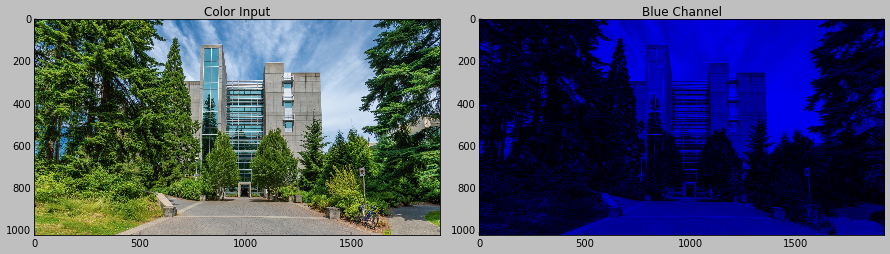

In [6]:
# TO-DO (1 point): Display, in the same plot, two images: the color input AND only
# its BLUE channel. (tip: pay attention to the color space!)
#
#
plt.style.use('classic')
#plt.figure(figsize = (200,200))
#OpenCV uses BGR, so here we split the 3 channels (blue is thus first)
blue, green, red = cv2.split(img)
#create a 2D array to hold 8-bit values (since 0-255) of the same shape as 
#the blue channel in the original image
zeros = np.zeros(blue.shape, np.uint8)
#here, we will take the blue channel matrix obtained using cv2.split
#and then use cv2.merge to fill the the red and green components of the color
#space with all zeros (creating an image which contains solely the blue channel)
blueRGB = cv2.merge((zeros,zeros,blue))
#print(blueRGB)
#blueRGB = cv2.cvtColor(blueRGB, cv2.COLOR_BGR2RGB)
#make one plot with two sub-plots (1 row, 1 column so they are side-by-side)
f, axarr = plt.subplots(1,2,figsize=(15,15), dpi=60)
#here we must change the color space from BGR to RGB
axarr[0].imshow((cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
axarr[1].imshow(blueRGB)
axarr[0].set_title('Color Input')
axarr[1].set_title('Blue Channel')

plt.tight_layout()

#this code can be used to display the blue image without a side-by-side
#comparison of the original image

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#blue, green, red = cv2.split(img)
#zeros = np.zeros(blue.shape, np.uint8)
#blueBGR = cv2.merge((zeros,zeros,blue))
#plt.imshow(blueBGR)




**Rescalling the image**: you will often work with image files in different ranges. Typical ranges include (but are not limited to) [0,1] and [0,255]. 

The maximum pixel value of the new rescaled image is: 1.0
The minimum pixel value of the new rescaled image is: 0.0


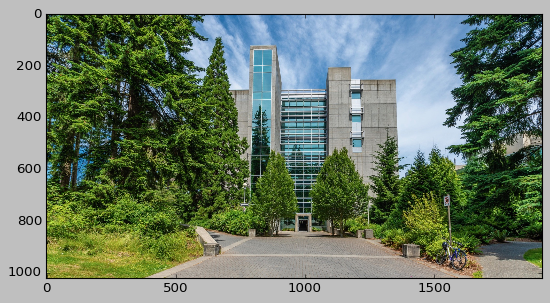

In [7]:
# TO-DO (2 points): rescale the image to the [0,1] range. Print the max and min values of the rescaled image and 
# plot the new color image. 
#

#since we already have a variable storing each RGB channel, we will 
#individually normalize each color space to the [0,1] range
blue_s = blue/255
red_s = red/255
green_s = green/255

#merge the colors back together to create RGB color image
img_s = cv2.merge((red_s, green_s, blue_s))
#max value of color image
M = np.max(img_s)
#min value of color image
m = np.min(img_s)
#print the max/min pixel values
print('The maximum pixel value of the new rescaled image is: {}'.format(M))
print('The minimum pixel value of the new rescaled image is: {}'.format(m))
#plot color image
plt.style.use('classic')
plt.imshow(img_s)

#used to double check range is in fact [0,1]
#print(blue_s)



This image is 3D. Performing conversion to greyscale...
----------------------------------------


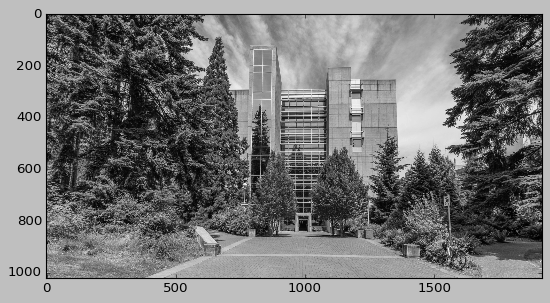

In [8]:
# TO-DO (5 points):
# 1) Create a greyscale version of the color image MANUALLY;
# 2) Plot this greyscale image.
# - Use the function template provided. 
# BONUS (1 point) - when converting to greyscale, use the ITU-R 601-2 luma transform:
# L = R * 299/1000 + G * 587/1000 + B * 114/1000

#got some help from the following website
#https://moonbooks.org/Articles/How-to-convert-an-image-to-grayscale-using-python-/
img = cv2.merge((red_s, green_s, blue_s))
def turnGrey(img, threeD=True): 
  # threeD = flag (i.e., "True" or "False") determining if the input has one or three channels (for plotting purposes)
  if not threeD:
    raise Exception('This image is not 3D, please try again')
  else:
    print('\nThis image is 3D. Performing conversion to greyscale...')
    print('-'*40)
  return np.dot(img, [0.2989, 0.5870, 0.1140])

# (Plot grayscale image obtained using turnGrey)

if len(img_s.shape)==2:
  threeD=False
elif len(img_s.shape)==3:
  threeD=True

img_g = turnGrey(img_s, threeD)
plt.imshow(img_g, plt.get_cmap('gray'))



**Point operators**: these common operators will consider a single pixel intensity of the input image when calculating a given output intensity (conversely from neighborhood operators such as image filters).   

The pixel values are in the range [0.3,1.0]
The pixel values are in the range [0.0,0.7]


Text(0.5, 1.0, 'Darkened')

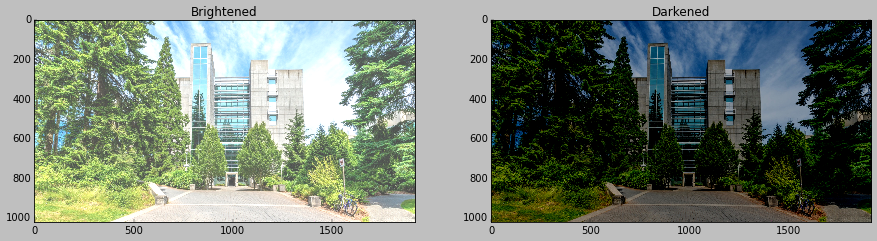

In [26]:
# TO-DO (4 points): Create two modified versions of the rescaled image. 
# 1) Brigthen the image by adding scalar 0.3 to all its pixel intensities;
# 2) Darken the image by subtracting all pixel values by scalar 0.3. 
# Note 1: your input image should have pixel intensities inside range [0,1]. 
# Note 2: The pixel intensities of the modified image should be inside range [0,1] (i.e., clip intensities if necessary). 
#

#this is the bias we will add and subtract for brightness adjustments
bias = 0.3

#here we add the bias to brighten the reduced [0,1] image
img_bright = np.add(img_s, bias)
#clip the values over/under 1/0 and return the result to the brightened image variable
np.clip(img_bright, 0, 1, img_bright)
#print the minimum and maximum pixel intensity values to ensure in range [0,1]
print('The pixel values are in the range [{},{}]'.format(np.min(img_bright), np.max(img_bright)))

#here we subtract the bias to darken the reduced [0, 1] image
img_dark = np.subtract(img_s, bias)
# clip the values over/under 1/0 and return the result to the darkened image variable
np.clip(img_dark, 0, 1, img_dark)
#print the minimum and maximum pixel intensity values to ensure in range [0,1]
print('The pixel values are in the range [{},{}]'.format(np.min(img_dark), np.max(img_dark)))

#swap around for saving
b_bright, g_bright, r_bright = cv2.split(img_bright)
img_bright_RGB = cv2.merge((r_bright, g_bright, b_bright))
b_dark, g_dark, r_dark = cv2.split(img_dark)
img_dark_RGB = cv2.merge((r_dark, g_dark, b_dark))

plt.style.use('classic')
# TO-DO: Show both modified images in a single plot. 
f, axarr = plt.subplots(1,2,figsize=(18,18), dpi=60)
#here we must change the color space from BGR to RGB
axarr[0].imshow(img_bright)
axarr[1].imshow(img_dark)
axarr[0].set_title('Brightened')
axarr[1].set_title('Darkened')


In [10]:
!ls

sample_data  uvic_1.jpg


The files contained within the working directory are as follows:

gamma_original.jpg
color_reference.png
uvic_1.jpg
bw_target.jpg
low_contrast.jpg


Text(0.5, 1.0, 'Gamma Corrected')

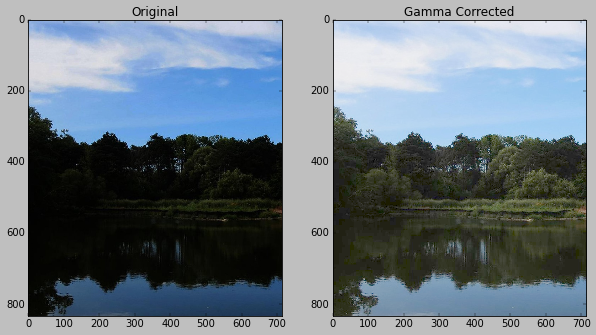

In [21]:
# TO-DO (5 points): Perform gamma correction in the image located at "gamma_original_address". 
# 1. Download the original image (check if it has been already downloaded first). 
# 2. Perform gamma correction with gamma = 2.2 (refer to gamma correction slides from Lecture #3).
# 3. Plot the original and corrected images in the same plot using matplotlib.

gamma_original_address = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/gamma_original.jpg"

#make sure that the gamma_original.jpg does not exist and then download it if it doesn't
ent2 = []
with os.scandir(working_dir) as entries:
  print('The files contained within the working directory are as follows:\n')
  for entry in entries:
    if entry.is_file():
      print(entry.name)
      ent2.append(entry.name)
#if the file we are looking for (uvic_1.jpg) is not found then download the image
if not (any('gamma_original.jpg' in s for s in ent2)):
    print('\n... Duplicate not found\n')
    print('Downloading Image...')
    os.system('wget {}'.format(gamma_original_address))
    for f_name in os.listdir(working_dir):
      if fnmatch.fnmatch(f_name, 'gamma_original.jpg'):
        print('\nImage "gamma_original.jpg" has been downloaded\n')

#read in the image for correction
gamma_orig_BGR = cv2.imread("gamma_original.jpg")
#split the channels from BGR color space
blue_G, green_G, red_G = cv2.split(gamma_orig_BGR)
blue_G = blue_G/255
green_G = green_G/255
red_G = red_G/255
#merge the channels into RGB color space
gamma_orig_RGB = cv2.merge((red_G, green_G, blue_G))
np.clip(gamma_orig_RGB, 0, 1, gamma_orig_RGB)

#adjust the gama (i.e. g(x) = [f(x)]^1/gamma)
gamma_corrected = np.power(gamma_orig_RGB, 1/2.2)

#switching back around for saving
b_gamma, g_gamma, r_gamma = cv2.split(gamma_corrected)
gamma_corrected_RGB = cv2.merge((r_gamma, g_gamma, b_gamma))

plt.style.use('classic')
# TO-DO: Show both modified images in a single plot. 
f, axarr = plt.subplots(1,2,figsize=(12,12), dpi=60)
#here we must change the color space from BGR to RGB
axarr[0].imshow(gamma_orig_RGB)
axarr[1].imshow(gamma_corrected)
axarr[0].set_title('Original')
axarr[1].set_title('Gamma Corrected')


In [12]:
# # TO-DO (3 points): Save all modified images (i.e., brigther, darker and greyscale) in your Colab working directory
# with .jpg extensions using OpenCV's "cv2.imwrite". The images should be saved
# in a folder named "output" (create this folder USING PYTHON if it does not yet exist).  
# Tips: use "cv2.normalize". Be careful with the image ranges and types. The
# saved images should preserve the "brighter", "darker" and "grey" effects. 
#
#
#
#
#got a bit of help from here: https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/
output_dir = "output"
path = os.path.join(working_dir, output_dir)
if not os.path.exists(path):
  os.mkdir(path)
  print('Directory "{}" created.\n'.format(output_dir))
else:
  print('Directory "{}" already exists.\n'.format(output_dir))

os.chdir(path)

uvic_resized_70 = "uvic_1_resized.jpg"
uvic_blue = "uvic_1_blue_ch.jpg"
uvic_gray = "uvic_1_gray.jpg"
uvic_bright = "uvic_1_bright.jpg"
uvic_dark = "uvic_1_dark.jpg"
gamma_2_p_2 = "gamma_corrected.jpg"
#cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.imwrite(uvic_resized_70, cv2.normalize(img_70, None, 0, 255, cv2.NORM_MINMAX))
cv2.imwrite(uvic_blue, cv2.normalize(cv2.cvtColor(blueRGB, cv2.COLOR_BGR2RGB), None, 0, 255, cv2.NORM_MINMAX))
cv2.imwrite(uvic_gray, cv2.normalize(img_g, None, 0, 255, cv2.NORM_MINMAX))
cv2.imwrite(uvic_bright, cv2.normalize(img_bright_RGB, None, 0, 255, cv2.NORM_MINMAX))
cv2.imwrite(uvic_dark, cv2.normalize(img_dark_RGB, None, 0, 255, cv2.NORM_MINMAX))
cv2.imwrite(gamma_2_p_2, cv2.normalize(gamma_corrected_RGB, None, 0, 255, cv2.NORM_MINMAX))

Directory "output" created.



True

### **3.2 Histogram calculation and matching** (50 points)

As discussed in class, histogram matching approximates a given pixel intensity frequency distribution (i.e., histogram) to a second, reference one. In this part of the assignment you are asked to create a function to implement such algorithm. See notes from the Point Operators and Histogram discussion (i.e., Lecture #3) for details on the Histogram matching algorithm.

The files contained within the working directory are as follows:

gamma_original.jpg
color_reference.png
uvic_1.jpg
bw_target.jpg
low_contrast.jpg


(0.0, 255.0)

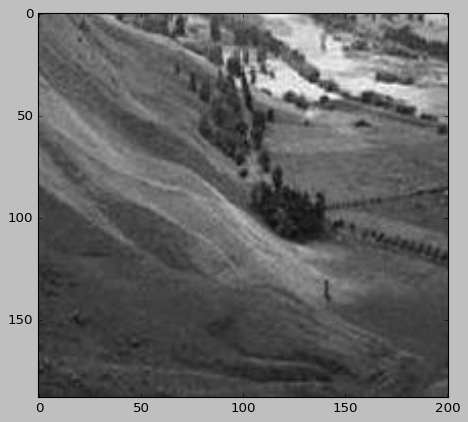

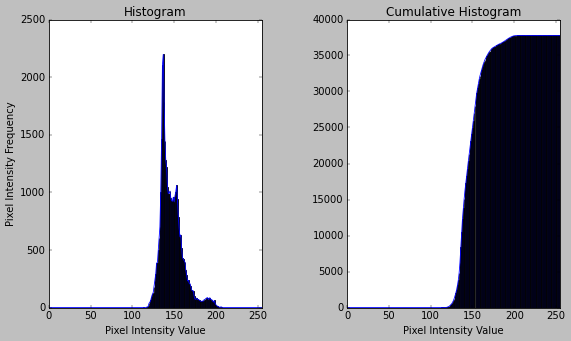

In [22]:
# TO-DO (13 points): Implement a function that calculates the histogram and the cumulative histogram of a given image MANUALLY.
# You CANNOT use any automated functions for histogram calculation (e.g., matplotlib.plt.hist, np.histogram, cv2.createCLAHE,
# cv2.calcHist). Use the function template provided by filling it with your code. 

#functionality has been added such that this function can also calculate the cumulative Href in the next assignment problem
def myHistogram(I, cumulative=True, calc_Href=False, Href=0):
  #inputs:
  # I: input greyscale image
  # cumulative: flag (i.e., "True" or "False") to determine the type of output. If True, return the cumulative histogram
  # found some help here: https://www.youtube.com/watch?v=OKz2wedpDcM&t=310s&ab_channel=AbubakrShafique
  
  #only do this (calculate histogram of the low contrast image) if we are not trying to calculate the cumulative Href
  if calc_Href:
    I=Href
  I_height = I.shape[0]
  if not calc_Href:
    I_width = I.shape[1]
  histogram = np.zeros([256], np.int32)
  cumulative_hist = np.zeros([256], np.int32)
  for x in range(0, I_height):
    if not calc_Href:
      for y in range(0, I_width):
        histogram[I[x,y]] += 1
    elif calc_Href:
      histogram[I[x]] += 1
  #elif calc_Href:
  #  I_height = len(Href)
  
  #If we are dealing with either a cumulative histogram of the low contrast image
  #or the cumulative histogram of Href (for the next question), then do this stuff
  #and return whichever one applies; otherwise, return the regular histogram of the
  #low contrast image
  #if cumulative and calc_Href:  #If we only want to calculate the cumulative histogram of Href
  #  for x in range(0, 256):
  #    Href_cumulative[x] = np.sum(Href[0:x+1])
  #  return Href_cumulative
  #elif cumulative and not calc_Href: #if we only want to calculate the cumulative histogram of the low contrast image
  #  for x in range(0, 256):
  #    cumulative_hist[x] = np.sum(histogram[0:x+1])
  #  return cumulative_hist #/np.sum(histogram[0:255])
  if cumulative: #if we only want to calculate the cumulative histogram of the low contrast image
    for x in range(0, 256):
      cumulative_hist[x] = np.sum(histogram[0:x+1])
    return cumulative_hist #/np.sum(histogram[0:255])
  elif not cumulative and not calc_Href:
    return histogram


# TO-DO (2 points): Download the image at "low_contrast_address" and read it with OpenCV as a single channel, 
# greyscale image. Calculate its regular and cumulative histograms using your "myHistogram" function,
# and display both of them in the same matplotlib plot. 
low_contrast_address = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/low_contrast.jpg"

# retrieve the image (download)
#make sure that the gamma_original.jpg does not exist and then download it if it doesn't
os.chdir(working_dir)
ent3 = []
with os.scandir(working_dir) as entries:
  print('The files contained within the working directory are as follows:\n')
  for entry in entries:
    if entry.is_file():
      print(entry.name)
      ent3.append(entry.name)
#if the file we are looking for (low_contrast.jpg) is not found then download the image
if not (any('low_contrast.jpg' in s for s in ent3)):
    print('\n... Duplicate not found\n')
    print('Downloading Image...')
    os.system('wget {}'.format(low_contrast_address))
    for f_name in os.listdir(working_dir):
      if fnmatch.fnmatch(f_name, 'low_contrast.jpg'):
        print('\nImage "low_contrast.jpg" has been downloaded\n')

#read in the grayscale image and then plot it
img_low_con_g = cv2.imread('low_contrast.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_low_con_g, plt.get_cmap('gray'))
#print(img_low_con_g)
#print(np.max(img_low_con_g))
#print(np.min(img_low_con_g))
histogram = myHistogram(img_low_con_g, False, False, 0)
cumulative = myHistogram(img_low_con_g, True, False, 0)

#print out histogram
#for i in range(0, len(histogram)):
#  print("Histogram[",i,"]: ", histogram[i])

#SHOW HISTOGRAMS 
#plt.style.use('classic')
#plt.figure()
f, axarr = plt.subplots(1,2,figsize=(11,6), dpi=60)
#here we must change the color space from BGR to RGB
axarr[0].plot(histogram)
axarr[0].bar(np.arange(len(histogram)),histogram)
axarr[0].set_title("Histogram")
axarr[0].set(xlabel='Pixel Intensity Value', ylabel='Pixel Intensity Frequency')
axarr[0].set_xlim([0,255])
axarr[0].fill_between(len(histogram), histogram)
#axarr[0].set_facecolor('grey')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.3)
axarr[1].plot(cumulative)
axarr[1].bar(np.arange(len(cumulative)),cumulative)
axarr[1].set_title("Cumulative Histogram")
axarr[1].set(xlabel='Pixel Intensity Value')
axarr[1].set_xlim([0,255])
#two ways found at https://stackoverflow.com/questions/48190894/how-to-convert-rgb-images-dataset-to-single-channel-grayscale/48191164
#to read in a grayscale image

#im_gray = cv2.imread('gray_image.png', cv2.IMREAD_GRAYSCALE)
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

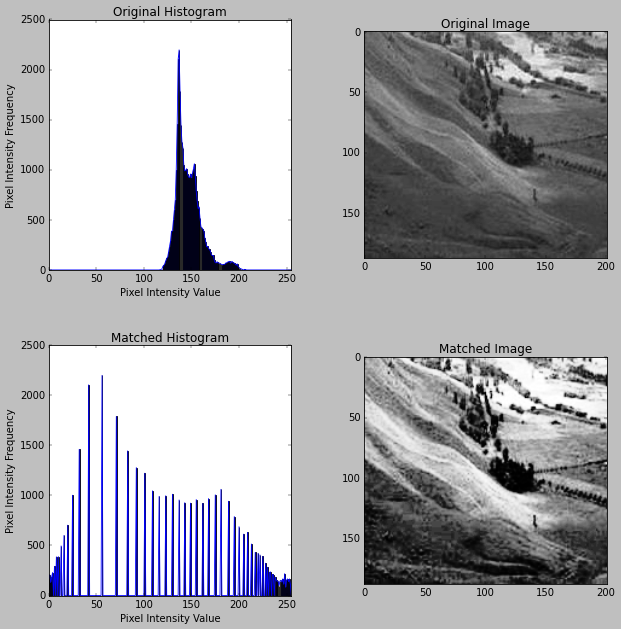

In [20]:
# TO-DO (12 points): Create a "match_histogram" function to implement the histogram matching algorithm. This function 
# receives an image, a reference cumulative histogram (previously calculated) and a reference number (you
# can use the maximum value of the reference cumulative histogram as a default for this parameter). Its output is a 
# transformation function F(x) that will map an input pixel intensity to an output pixel intensity. For example, 
# if F[11]=17, an input pixel with intensity 11 should be replaced by one of intensity 17. See the details of the
# algorithm in the Histogram lecture, available on BrightSpace. Use the function skeleton provided. (5 points)

def match_histogram(I, Href, nref):
  # inputs:
  # I: input image (greyscale)
  # Href: cumulative histogram of the reference image 
  # nref: parameter to control the transformation behaviour. You can use the max of Href as default value. 
  n = I.shape[0]*I.shape[1]
  #print(n)
  r = n/nref
  h = myHistogram(I, False, False, 0)
  F = np.zeros(256, np.int32)
  i = 0
  j = 0
  c = 0
  while i < 256:
    if c <= r*Href[j]:
      c = c + h[i]
      F[i] = j
      i = i + 1
    else:
      j = j + 1
  return F # F is the transformation function (represented as a list)

# TO-DO (2 points): Create a numpy array called Href with 256 positions populated with values 0,1,2,...,255.
#
#
Href = np.arange(0,256,1, np.uint32)
nref = Href.max()
#print(nref)

# TO-DO (2 points): Calculate the cumulative histogram of Href using your myHistogram function. This is 
# going to represent your reference cumulative histogram.
#
#
Href_cumulative = myHistogram(img_low_con_g, True, True, Href)
#print(Href_cumulative)
#plt.plot(Href_cumulative)
#plt.bar(np.arange(len(Href_cumulative)),Href_cumulative)

# TO-DO (2 points): Use your "match_histogram" function where I is the low contrast image and Href is the 
# cumulative histogram you just calculated. You will obtain transformation function F. 
#
#
F = match_histogram(img_low_con_g, Href_cumulative, nref)

# TO-DO (2 points): Apply F (the transformation function you just calculated) to transform
# the pixel intensities from the original image to that of the histogram-matched
# one. You should obtain the histogram-matched image as a result of this operation.
# BONUS (3 points): do not use loops when applying F. 
#
#For some reason I had to read the image again (despite resetting run time and re-running the code)
img_low_con = cv2.imread('low_contrast.jpg', cv2.IMREAD_GRAYSCALE)
img_low_con_g_matched = img_low_con #transfer the orignal image into this variable so that we can modify it

#apply the F transformation function (could not figure out how to do it without a loop - I tried lambda, and map..
#the lambda function does not allow the use of assignment operators.. not sure how to do it otherwise!)
for x in range(0, img_low_con_g.shape[0]):
  for y in range(0, img_low_con_g.shape[1]):
    k = img_low_con_g[x, y]
    img_low_con_g_matched[x,y] = F[k]

#print(img_low_con_g_matched)
#plt.imshow(img_low_con_g_matched, plt.get_cmap('gray'))

matched_histogram = myHistogram(img_low_con_g_matched, False, False, 0)
#plt.plot(matched_histogram)
#plt.bar(np.arange(len(matched_histogram)),matched_histogram)


# TO-DO (3 points): Create a 4-element subplot with the matplot lib: 1) Original image; 2) Original 
# image's histogram; 3) Output image (result of the histogram matching procedure);
# 4) the histogram of the output image. 
# Your output show look like this reference: 
# "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/reference_output_1.jpg"
# Tip 1: use "plt.subplots_adjust" to avoid overlapping between adjacent subplots.
# Tip 2: make sure your images are 3-channel before trying to display them with 
# matplotlib. 
#
#
#plt.figure()
f, axarr = plt.subplots(2,2, figsize=(12,12), dpi=60)

#plot the original histogram
axarr[0,0].plot(histogram)
axarr[0,0].bar(np.arange(len(histogram)),histogram)
axarr[0,0].set_title("Original Histogram")
axarr[0,0].set(xlabel='Pixel Intensity Value', ylabel='Pixel Intensity Frequency')
axarr[0,0].set_xlim([0,255])
#axarr[0,0].fill_between(len(histogram), histogram)
#axarr[0,0].set_facecolor('grey')
#adjust subplots so no overlap

#plot the matched histogram
axarr[1,0].plot(matched_histogram)
axarr[1,0].bar(np.arange(len(matched_histogram)),matched_histogram)
axarr[1,0].set_title("Matched Histogram")
axarr[1,0].set(xlabel='Pixel Intensity Value', ylabel='Pixel Intensity Frequency')
axarr[1,0].set_xlim([0,255])

#plot the original image
axarr[0,1].imshow(img_low_con_g, plt.get_cmap('gray'))
axarr[0,1].set_title("Original Image")

#plot the output image
axarr[1,1].imshow(img_low_con_g_matched, plt.get_cmap('gray'))
axarr[1,1].set_title("Matched Image")


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)


The files contained within the working directory are as follows:

gamma_original.jpg
uvic_1.jpg
low_contrast.jpg

... Duplicate not found


Image "bw_target.jpg" has been downloaded


The files contained within the working directory are as follows:

gamma_original.jpg
uvic_1.jpg
bw_target.jpg
low_contrast.jpg

... Duplicate not found


Image "color_reference.png" has been downloaded



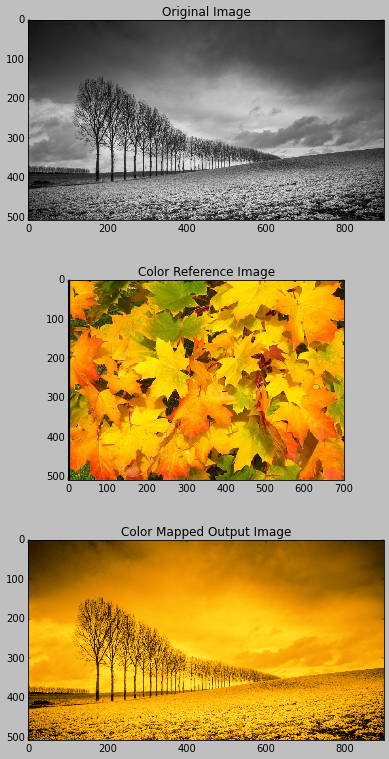

In [15]:
# TO-DO (9 points): Adapt the histogram matching procedure to 3-channel images 
# (i.e., a single histogram matching process done three times). 
# Download and read the images at the "color_reference_add" and 
# "bw_target_add" addresses. Use the color image to calculate 
# the refence cumulative histograms, and the B&W image as a target of the 
# histogram matching process. Note that both images are 3-channel. 
def applyTransformation(img, F):

  for x in range(0, img.shape[0]):
    for y in range(0, img.shape[1]):
      k = img[x, y]
      img[x,y] = F[k]
  return img

def matchRGB(target, reference):
  # Inputs:
  # target: image to be modified by the histogram matching process (3-channel)
  # reference: image to be used as reference for the histogram matching process (3-channel)
  blue_r, green_r, red_r = cv2.split(img_reference)
  blue_t, green_t, red_t = cv2.split(img_target)
  #print(blue_t)
  #print(img_target[2])

  #plt.imshow(blue_r)
  #plt.imshow(green_r)
  #plt.imshow(red_r)
  #plt.imshow(blue_t)
  #plt.imshow(green_t)
  #plt.imshow(red_t)

  #zeros = np.zeros(blue_r.shape, np.uint8)
  #blue_img_r = cv2.merge((zeros, zeros, blue_r))
  #plt.imshow(blue_img_r)

  Href_b = myHistogram(blue_r, True, False, 0)
  Href_g = myHistogram(green_r, True, False, 0)
  Href_r = myHistogram(red_r, True, False, 0)

  #hist_b_t = myHistogram(blue_t, True, False, 0)
  #hist_g_t = myHistogram(green_t, True, False, 0)
  #hist_r_t = myHistogram(red_t, True, False, 0)

  #plt.plot(hist_g_t)

  nref_b = Href_b.max()
  nref_g = Href_g.max()
  nref_r = Href_r.max()
  #print(nref_b)

  F_b = match_histogram(blue_t, Href_b, nref_b)
  F_g = match_histogram(green_t, Href_g, nref_g)
  F_r = match_histogram(red_t, Href_r, nref_r)

  #F_b = match_histogram(img_target, Href_b, nref_b)
  #F_g = match_histogram(img_target, Href_g, nref_g)
  #F_r = match_histogram(img_target, Href_r, nref_r)
  #print(F_b)
  #print(F_g)
  #print(F_r)

  blue_t_matched = applyTransformation(blue_t, F_b)
  green_t_matched = applyTransformation(green_t, F_g)
  red_t_matched = applyTransformation(red_t, F_r)

  #print(blue_t)
  #print(F_b)
  #print(red_t_matched)
  #print(green_t_matched)

  target_matched = cv2.merge((blue_t_matched, green_t_matched, red_t_matched))
  

  return target_matched # modified version of the "target" input image

bw_target_add = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/bw_target.jpg"
color_reference_add = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/color_reference.png"

# (Download the images at "bw_target_add" and "color_reference_add") and 
# use them as input of your matchRGB function
#
os.chdir(working_dir)
ent4 = []
with os.scandir(working_dir) as entries:
  print('The files contained within the working directory are as follows:\n')
  for entry in entries:
    if entry.is_file():
      print(entry.name)
      ent4.append(entry.name)
#if the file we are looking for (low_contrast.jpg) is not found then download the image
if not (any('bw_target.jpg' in s for s in ent4)):
    print('\n... Duplicate not found\n')
    print('Downloading Image...')
    os.system('wget {}'.format(bw_target_add))
    for f_name in os.listdir(working_dir):
      if fnmatch.fnmatch(f_name, 'bw_target.jpg'):
        print('\nImage "bw_target.jpg" has been downloaded\n')
ent5 = []
with os.scandir(working_dir) as entries:
  print('\nThe files contained within the working directory are as follows:\n')
  for entry in entries:
    if entry.is_file():
      print(entry.name)
      ent5.append(entry.name)
#if the file we are looking for (low_contrast.jpg) is not found then download the image
if not (any('color_reference.png' in s for s in ent5)):
    print('\n... Duplicate not found\n')
    print('Downloading Image...')
    os.system('wget {}'.format(color_reference_add))
    for f_name in os.listdir(working_dir):
      if fnmatch.fnmatch(f_name, 'color_reference.png'):
        print('\nImage "color_reference.png" has been downloaded\n')

###############################

img_target = cv2.imread('bw_target.jpg')
img_reference = cv2.imread('color_reference.png')

target_matched = matchRGB(img_target, img_reference)
#print(target_matched)
#plt.imshow(cv2.cvtColor(target_matched, cv2.COLOR_BGR2RGB))
#plt.plot(F_b)

#axarr[0,0].plot(Href_b)
#axarr[0,0].bar(np.arange(len(Href_b)),Href_b)
#axarr[0,0].set_title("Blue ref")
#axarr[0,0].set(xlabel='Pixel Intensity Value')
#axarr[0,0].set_xlim([0,255])

#axarr[0,1].plot(Href_g)
#axarr[0,1].bar(np.arange(len(Href_g)),Href_g)
#axarr[0,1].set_title("Green ref")
#axarr[0,1].set(xlabel='Pixel Intensity Value')
#axarr[0,1].set_xlim([0,255])

#axarr[0,2].plot(Href_r)
#axarr[0,2].bar(np.arange(len(Href_r)),Href_r)
#axarr[0,2].set_title("Red ref")
#axarr[0,2].set(xlabel='Pixel Intensity Value')
#axarr[0,2].set_xlim([0,255])

#axarr[1,0].plot(F_b)
#axarr[1,0].bar(np.arange(len(F_b)),F_b)
#axarr[1,0].set_title("Red ref")
#axarr[1,0].set(xlabel='Pixel Intensity Value')
#axarr[1,0].set_xlim([0,255])

#axarr[1,1].plot(Href_r)
#axarr[1,1].bar(np.arange(len(Href_r)),Href_r)
#axarr[1,1].set_title("Red ref")
#axarr[1,1].set(xlabel='Pixel Intensity Value')
#axarr[1,1].set_xlim([0,255])

#axarr[1,2].plot(Href_r)
#axarr[1,2].bar(np.arange(len(Href_r)),Href_r)
#axarr[1,2].set_title("Red ref")
#axarr[1,2].set(xlabel='Pixel Intensity Value')
#axarr[1,2].set_xlim([0,255])

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.5)

#print(blue_r)
#print(blue_img_r)
#print(green_r)
#print(red_r)

# TO-DO (3 points): Display the reference color image and the output, histogram-matched image. Your output should look 
# like this reference: "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/reference_output_2.jpg"
# Tip: be mindful of the colorspace from cv2-read images. 
#
f, axarr = plt.subplots(3,1, figsize=(15,15), dpi=60)
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=my_dpi)
axarr[0].imshow(img_target)
axarr[0].set_title("Original Image")
axarr[1].imshow(cv2.cvtColor(img_reference, cv2.COLOR_BGR2RGB))
axarr[1].set_title("Color Reference Image")
axarr[2].imshow(cv2.cvtColor(target_matched, cv2.COLOR_BGR2RGB))
axarr[2].set_title("Color Mapped Output Image")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
#plt.style.use('classic')
#plt.tight_layout()

**End of the assignment!**